<a href="https://colab.research.google.com/github/sreesujit88/Car_purchase_amount_prediction/blob/main/Car_purchase_amount_prediction_SUJIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/Car_Purchasing_Data.csv')

In [4]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
data.tail()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,USA,1,47,61370.67766,9391.341628,462946.4924,45107.22566


In [6]:
data.shape

(500, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [8]:
data.isnull()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [10]:
data.describe() #only shows numerical values

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [11]:
 #visualization data
import seaborn as sns
import matplotlib.pyplot as plt

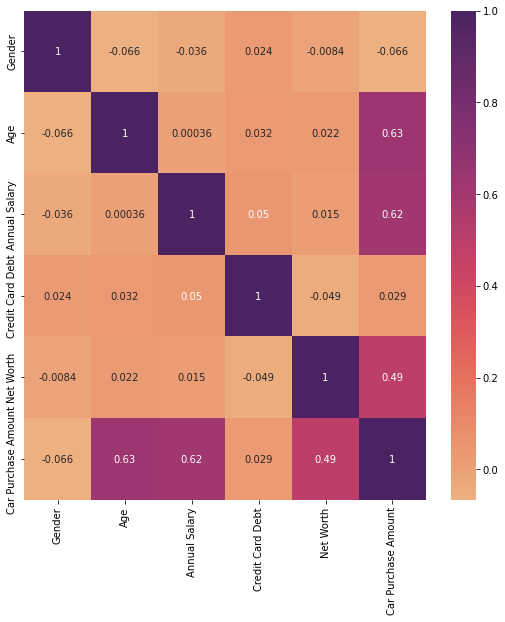

In [12]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(data.corr(), annot=True,ax=ax, cmap='flare')
plt.show()

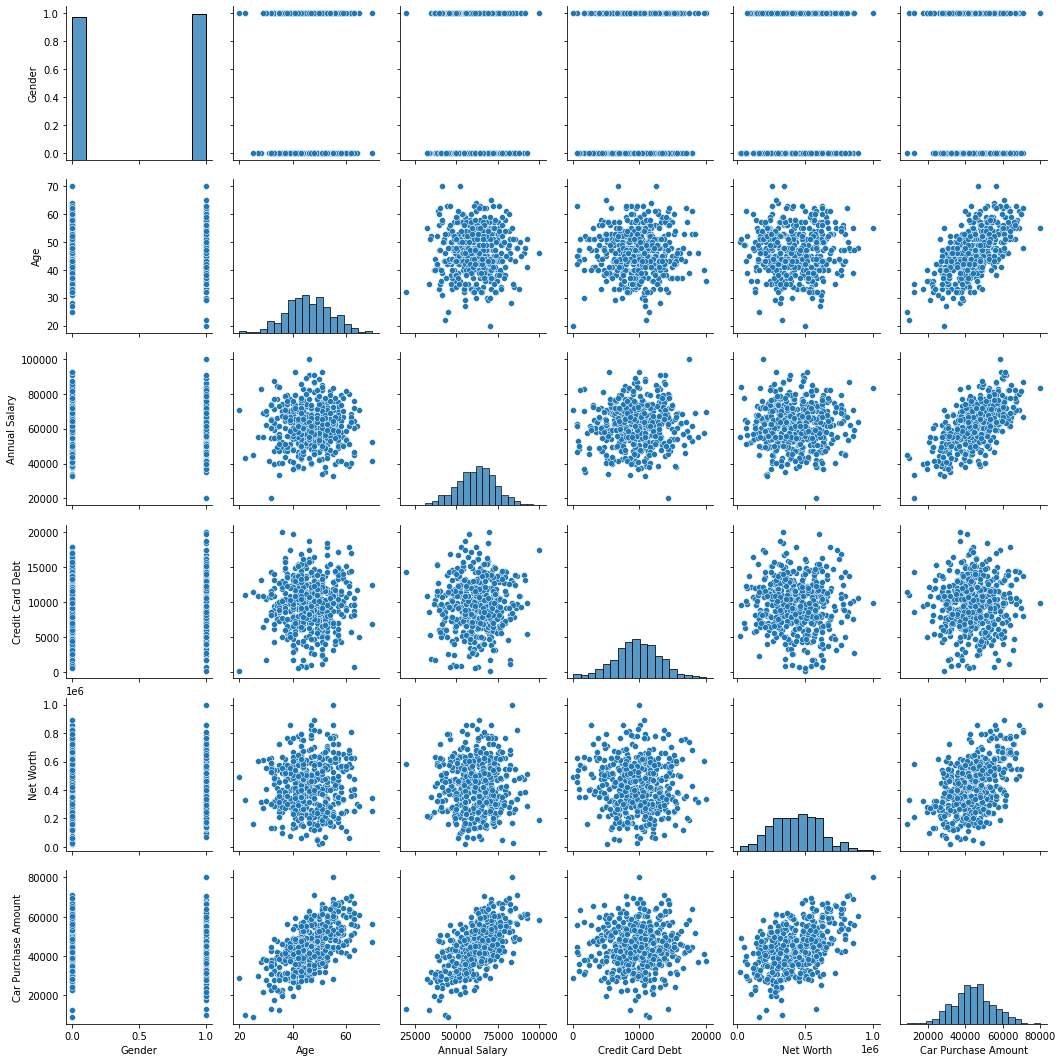

In [13]:
sns.pairplot(data)

In [14]:
data.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [15]:
x= data.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'],axis= 1)

In [17]:
 #independent variable in x
 x

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,42,62812.09301,11609.380910,238961.2505
1,0,41,66646.89292,9572.957136,530973.9078
2,1,43,53798.55112,11160.355060,638467.1773
3,1,58,79370.03798,14426.164850,548599.0524
4,1,57,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41,71942.40291,6995.902524,541670.1016
496,1,38,56039.49793,12301.456790,360419.0988
497,1,54,68888.77805,10611.606860,764531.3203
498,1,59,49811.99062,14013.034510,337826.6382


In [18]:
y=data.iloc[:,8:9].values

In [19]:
#terget varible 
y

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601],
       [59045.51309],
       [42288.81046],
       [28700.0334 ],
       [49258.87571],
       [49510.03356],
       [53017.26723],
       [41814.72067],
       [43901.71244],
       [44633.99241],
       [54827.52403],
       [51130.95379],
       [43402.31525],
       [47240.86004],
       [46635.49432],
       [45078.40193],
       [44387.58412],
       [37161.55393],
       [49091.97185],
       [58350.31809],
       [43994.35972],
       [17584.56963],
       [44650.36073],
       [66363.89316],
       [53489.46214],
       [39810.34817],
       [51612.14311],
       [38978.67458],
       [10092.22509],
       [35928.52404],
       [54823.19221],
       [45805.67186],
       [41567.47033],
       [28031.20985],
       [27815.73813],
       [68678.4352 ],
       [68

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
sc = MinMaxScaler()
x_scaled= sc.fit_transform(x)

In [22]:
x_scaled

array([[0.        , 0.44      , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.42      , 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46      , 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.68      , 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78      , 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.54      , 0.51713347, 0.46690159, 0.45198622]])

In [23]:
sc1 = MinMaxScaler()

In [24]:
y_scaled =sc1.fit_transform(y)

In [25]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [26]:
#splitting The dataset into the train set and test set
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x_scaled, y_scaled, test_size=0.20,random_state=42)

In [27]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [29]:
lr = LinearRegression()
lr.fit(x_train,y_train)

svm = SVR()
svm.fit(x_train,y_train)

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

xg = XGBRegressor()
xg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:07:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [30]:
y_pred1= lr.predict(x_test)
y_pred2= svm.predict(x_test)
y_pred3= lr.predict(x_test)
y_pred4= rf.predict(x_test)
y_pred5= gbr.predict(x_test)

In [31]:
#evaluatin the algorithalgorithm 
from sklearn import metrics

In [33]:
score1 =metrics.r2_score(y_test,y_pred1)
score2 =metrics.r2_score(y_test,y_pred2)
score3 =metrics.r2_score(y_test,y_pred3)
score4 =metrics.r2_score(y_test,y_pred4)
score5 =metrics.r2_score(y_test,y_pred5)

In [34]:
print(score1,score2, score3, score4, score5 )

0.9994234310992762 0.9547066777872097 0.9994234310992762 0.9471877355651189 0.9744069528409993


In [35]:
final_data= pd.DataFrame({'Models':['LR', 'SVR','RF', 'GBR','XG'],'R2_SCORE':[score1, score2, score3, score4, score5]})

In [36]:
final_data

,Models,R2_SCORE
0,LR,0.999423
1,SVR,0.954707
2,RF,0.999423
3,GBR,0.947188
4,XG,0.974407


In [37]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


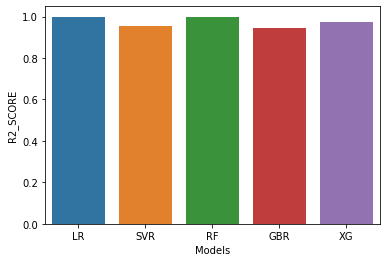

In [38]:
sns.barplot(final_data['Models'],final_data['R2_SCORE'])

In [40]:
# import tensorflow.keras
# from keras.models import Sequential
# from keras.layers import Dense
# Save The Moel

import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [41]:
data.head(1)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.38091,238961.2505,35321.45877


In [43]:
x_test1 = sc.transform(np.array([[0, 42, 62812.09301, 11609.38091 , 238961.2505]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [44]:
x_test1

array([[0.        , 0.44      , 0.53515116, 0.57836085, 0.22342985]])

In [52]:
pred = lr.predict(x_test1)

In [53]:
sc1.inverse_transform(pred)

array([[35470.7411572]])